#             Coursera Capstone Project - Final Course for the IBM Data Science Certificate

In this notebook, a problem is identified and described, the choices to solve it are discussed and the steps taken in order to prepare the data and build the model are explained. 

This is the final assignment for the last course of the IBM Data Science Professional Certificate. 

# Using Machine Learning to predict accident severity

## 1. Introduction

In the United States, around 6 Million car crashes happen every year, and more than 90 people die in car accidents every day. ([Source](https://www.driverknowledge.com/car-accident-statistics/)) These accidents can pose a significant inconvenience for cities and municipalities, as they have to deal with the consequences like traffic jams, the costs for repairing or replacing public property which was damaged, and the bad image it gives their voters. Therefore, a certain interest lies in investing into a method which could reduce the occurence of car accidents. 

Different approaches to reduce the number of accidents can be advanced driver assistance systems, awareness campaigns, or prediction systems, which can inform drivers when the probability for an accident is high in order for them to pay more attention. In this report, a dataset from Seattle containing all the accidents recorded since 2004 until present, including all types of collisions, is used to build a machine learning (ML) model which is able to predict accidents and their severity. A detailed description file of the data can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf), the most relevant attributes are also described in Chapter 2. There is a considerable amount of factors which can lead to an accident and which affect the severity of those. Therefore, the most significant factors are identified and used for building the predictive model. 


### 1.1. The case of Seattle

The dataset, which is described in the next Chapter, contains data about accidents that occured in the city of Seattle in the United States. By having a first look at the dataset, various information can be extracted and displayed. For a first look, the number of accidents per year since 2004 are identified and shown in the plot below.  Assuming that the first and last year (2004 and 2020) are incomplete, the last year is dropped in order to avoid wrong indications about the trend.

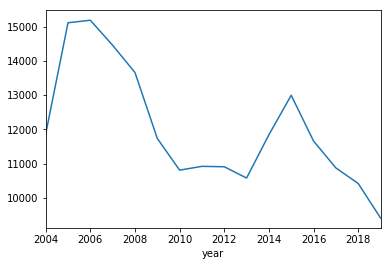

In [5]:
df_new = df
df_new['time'] = pd.to_datetime(df_new['INCDTTM'])
df_new['year'] = df_new['time'].dt.year
df_new = df_new.groupby('year', axis=0).size()
df_new = df_new[:-1]
df_new.plot()

It can be seen that in the past 16 years, the number of accidents were mostly above 10 000 per year. The number of accidents, apart from another peak around 2015, has generally decreased from around 15 000 per year in 2006 to around 10 000 in 2019. There can be various reasons for this significant change, however, exploring them is beyond the scope of this report.

### 1.2. Aim and scope of the report

This report aims to identify the most relevant factors which lead to "severe" accidents, as well as to predict the possibility and severity of future accidents based on a dataset about accidents in Seattle. The general problem as well as the aim are described in the current Introduction chapter. This will be followed by the Dataset chapter, where the data and its attributes are outlined and their potential relevance explained.  Next, a Methodology chapter is provided, where the technology used to carry out the calculations and analysis is described. It is followed by a Data Preparation chapter, where the steps for cleaning and preparing the data are given.  The results of the analysis are presented in the Results chapter, followed by a Discussion with the breakdown of the results, and finally the Conclusion chapter. 


## 2. The Dataset

As mentioned in the previous chapter, the dataset used for the ML model contains ddata of accidents that have occured in Seattle in the United States, since 2004. At the time of when this report is written in September 2020, the dataset consists of 194 673 rows and 38 columns. This means that since the starting year of the data collection (2004) until present, almost 200 000 accidents have been recorded. Furthermore, there are 38 attributes to each row, of which the relevance is identified in course of the data cleaning and preparation phase. 

### 2.1. Accident "Severity"
The severity of accidents is represented through a "severity code", where 
- 3 means fatality 
- 2b means serious injury 
- 2 means injury 
- 1 means property damage, and 
- 0 means unknown, or no record of fatalities, injuries or property damage. 

This code is what is to be predicted by the ML model. Other columns contain specified information on the severity:
- The total number of people involved in the collision 
- The number of pedestrians involved in the collision
- The number of bicycles involved in the collision
- The number of vehicles involved inthe collision
- The number of total injuries in the collision
- The number of serious injuries in the collision
- The number of fatalities in the collision

This information can be useful to find patterns between the number of fatalities, injuries, etc. and different conditions mentioned further below. However, upon closer look at the dataset, we find that certain input or columns specified in the document are not found in the dataset aquired. By checking the input with the .unique() function for the SEVERITYCODE, it can be found that only the codes 2 (injury) and 1 (property damage) are used as input in the SEVERITYCODE. What is more, we find that the columns for injuries, serious injuries and fatalities are not in the dataset: 


In [6]:
print("Severity: ", df['SEVERITYCODE'].unique())
print(df.dtypes)

Severity:  [2 1]
SEVERITYCODE               int64
X                        float64
Y                        float64
OBJECTID                   int64
INCKEY                     int64
COLDETKEY                  int64
REPORTNO                  object
STATUS                    object
ADDRTYPE                  object
INTKEY                   float64
LOCATION                  object
EXCEPTRSNCODE             object
EXCEPTRSNDESC             object
SEVERITYCODE.1             int64
SEVERITYDESC              object
COLLISIONTYPE             object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDATE                   object
INCDTTM                   object
JUNCTIONTYPE              object
SDOT_COLCODE               int64
SDOT_COLDESC              object
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 

Therefore, for this report, only two types of severities can be predicted. 

### 2.2. Other attributes

Next, there are various columns describing different internal and external conditions:
- INATTENTIONIND: Whether or not collision was due to inattention
- UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol
- WEATHER: A description of the weather conditions during the time of the collision
- ROADCOND: The condition of the road during the collision
- LIGHTCOND: The light conditions during the collision
- PEDROWNOTGRNT: Whether or not the pedestrian right of way was not granted
- SPEEDING: Whether or not speeding was a factor in the collision

These attributes will likely be very useful for the prediction model. In addition, the time and date of the incident are stored for every incident. This information could be useful to identify patterns based on the month, or even day of the week. 

Finally, a code dictionary for a closer description of the event is provided, some of which are:
- Vehicle Backing Hits Pedestrian
- Train Struck Stopped or Stalled Vehicle
- Vehicle Struck Moving Train

 to name a few. Their relevance, just like that of the other attributes, is identified during the data cleaning and preparation phase which is described in the Data Preparation chapter. 

## 3. Methodology 

The following chapter contains a brief description of technology used to carry out the analysis in this report. That includes ML algorithms, especially the ones used in this report, and some basic information about the programming language Python.

### 3.1. Python

Python is a universal, usually interpreted, higher programming language. It was developed by Guido van Rossum in the 90s and has since become a very popular and widely used language. Python has an easy to read, concise programming style and is well suited for beginners in the programming field. It is easily compatible with other languages, runs on many different platforms and is open source. ([Source](https://www.python.org))  As of 2019, there were more than 137,000  libraries and nearly 200 000 packages available for python ([Source](https://www.ubuntupit.com/best-python-libraries-and-packages-for-beginners/)) and the number is growing. Some of the most important and most frequently used are `Pandas` and`NumPy` for scientific computing,  `Matplotlib` and `Seaborn` for visualisation, `SciKit-learn` for ML and `TensorFlow` and `PyTorch` for Deep Learning. ([Source](https://www.coursera.org/learn/open-source-tools-for-data-science/home/welcome))


### 3.2. Machine Learning

ML models are an "equation" or algorithm used to predict a value based on the information from one or more other values. In other words, it relates one or more independent variables to one dependant variable (predicted value).([Source](https://www.coursera.org/learn/data-analysis-with-python/home/welcome)) ML is the ability to learn without being explicitly programmed, and is a sub-field of Artificial Intelligence. There are different types of ML models: 

- Regression/Estimation: Continuous numerical values are predicted, e.g. price development of a product
- Classification: Predicts the class or category, e.g. whether an accident is severe or not
- Clustering: Finds a structure in a dataset, e.g. grouping customers based on shopping interests
- Associations: associates items or events which occur together frequently, e.g. products which are being purchased together

ML can also be divided into supervised and unsupervised learning, where the former is working on a labeled dataset and is a more controlled form of learning, and the latter is drawing conculsions on unlabeled data and is therefore more uncontrolled in its learning form. Examples of supervised learning are Regression and Classification, while unsupervised learning models can be Clustering or Association. ([Source]( https://www.coursera.org/learn/machine-learning-with-python/home/welcome))

`For this report, a Classification method is used to predict the severity of an accident. This is because there are two accident severities available to predict (1: property damage, low severity, and 2: injury, high severity). In this report, the Decision Tree method is chosen for prediction based on binary attributes (cases with Yes or No). The significance of the attribute is shown during the calculation, and the best attribute can be identified and used to have the most accurate outcome. For the continuous variables, Logistic Regression is used. That is because it predicts a binary variable and it requires continuous numeric variables as input.` 

As mentioned above, Classification models are used to predict a category or class. There are different types of Classification models, namely k-nearest neighbours (kNN), Decision Trees, Logistic Regression and Suport Vector Machine, to name a few. The two models used in this report are described below.

#### 3.2.1 Decision Trees 

#### 3.2.2 Logistic Regression

bla

## 4. Data Preparation

This chapter follows the several steps of data preparation. It includes handling missing values, normalising data, and transforming them, if necessary, to ensure simplicity for the analysis later on. In general, this step is often revisited during the analysis, to make sure the data is formatted in a way that suits the algorithm used in the most efficient way.  

### 4.1. Irrelevant columns

The raw dataset consists of 38 columns. Studying the description sheet or the information provided in the dataset, it is clear that there are several columns which are redundant for the analysis carried out in this report, like different keys, multiple time indicators, or the report number. For the simplification of further  examination, following columns are dropped:

- LOCATION: Description of the general location of the collision, out of scope
- X and Y: Coordinates of the location, out of scope
- EXCEPTRSNCODE: no description provided
- EXCEPTRSNDESC: no description provided
- INCKEY:  A unique key for the incident, redundant
- COLLISIONTYPE: Type of collision, e.g. parked car, left turn, ..., out of scope
- COLDETKEY: Secondary key for the incident, redundant
- INTKEY: Key that corresponds to the intersection associated with a collision, out of scope
- SEVERITYDESC: A detailed description of the severity of the collision, redundant
- INCDATE: The date of the incident, replaced by a datetime object
- INCDTTM: The date and time of the incident, redundant
- SDOT_COLDESC: A description of the collision corresponding to the collision code, out of scope
- ST_COLDESC: A description of the collision corresponding to the collision code, out of scope
- ST_COLCODE:  A description of the collision corresponding to the collision code, out of scope 
- SDOTCOLNUM: A number given to the collision by SDOT, redundant
- SEGLANEKEY: A key for the lane segment in which the collision occurred, out of scope
- CROSSWALKKEY: A key for the crosswalk at which the collision occurred, out of scope

Given that there are attributes like INTKEY, SEGLANKEY and CROSSWALKKEY, which are keys for specific location of where the accident occured, it could be interesting to investigate if any specific crosswalks have a higher number of accidents than the average. However, that is beyond the scope of this report, therefore in this analysis those attributes are not used.  

Columns like LOCATION could be interesting to see whether certain locations are more bound to be the place of an accident. For simplification reasons, this analysis will focus on general conditions which can lead to accidents of several levels of severity, and less on the location itself. This way, the business idea has room for further expansion to other cities or areas later on. 

Given that the OBJECTID is a unique identifier of each incident or row, it is set as the index. 

### 4.1. Data format correction

Plot functions as well as algorithms work properly when data is provided in numerical values. Some of the data in the used dataset however is given as string-objects. Therefore, to simplify the functionality, the values are converted into integer values. First, the unique values for each column are looked at: 

In [9]:
for key, value in df_new.iteritems(): 
    print(key, " ", df_new[key].unique()) 
    print() 

SEVERITYCODE   [2 1]

ADDRTYPE   ['Intersection' 'Block' 'Alley' nan]

PERSONCOUNT   [ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]

PEDCOUNT   [0 1 2 3 4 5 6]

PEDCYLCOUNT   [0 1 2]

VEHCOUNT   [ 2  3  1  0  4  7  5  6  8 11  9 10 12]

JUNCTIONTYPE   ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']

SDOT_COLCODE   [11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]

INATTENTIONIND   [nan 'Y']

UNDERINFL   ['N' '0' nan '1' 'Y']

WEATHER   ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']

ROADCOND   ['Wet' 'Dry' nan 'Unknown' 'Snow/Sl

Some of the columns like PEDROWNOTGRNT and SPEEDING open room to the assumption that it only has been recorded when the case was true, given that the only two values existing are Y (yes) and NaN. Therefore, in this report they are seen as a "N" (no, e.g. no speeding). Others, like UNDERINFL have both the boolean integer 0 and 1, as well as Y and N. Here, the Y and N values are converted to integer as well. Columns like WEATHER have various string-type values, which are converted to integer values as well. The values in those latter columns which contain "Unknown" as input are converted to NaN. 

### 4.2. Missing Values

It is common to find missing data in a dataset, and there are several ways to deal with this problem. In general, these values are converted to "NaN" (Not a Number), a default value marker of Python. When looking at the first five rows of the dataset above, it can be seen that the values in the INATTENTIONIND column are NaN. To see how many missing values can be found in each column, a built-in function `isnull()` of Python is used. Filled-in values are counted as False, missing values are counted as True. 

A few columns are complete, no "True" value is counted, while others have a significant amount of missing data. This can be handled in several ways; one can 
- drop the rows with missing data, or the column if too many input values are missing. 
- replace it by the mean
- replace it by the frequency of occurence in the data.

For ascending numerical values like PERSONCOUNT or VEHCOUNT, and average or most frequent value can be used to replace the missing value. 

Before checking on these values, the amount of missing values in a row is looked at; if a row contains two or more missing values, it is dropped from the dataset. Even though this method decreases the size of the dataset, it is more accurate than replacing multiple missing values for one case. It is determined that with the Unknown values converted to NaN, 9123 rows have 2 or more missing values. Given that the dataset contains almost 200 000 rows, the 9 000 rows with the missing values can be dropped without worry about the size of the dataset.  

For the remaining 176489 rows, the NaN values are identified again and, in most cases, replaced with the most frequent value of the relevant column. The most frequent values are:
- LIGHTCOND: Daylight
- ROADCOND: Dry
- ADDTYPE: Block
- PERSONCOUNT: 2
- PEDCOUNT: 0
- PEDCYLCOUNT: 0
- VEHCOUNT: 2
- JUNCTIONTYPE: Mid-Block (not related to intersection) 
- INATTENTIONIND: No
- UNDERINFL: No
- WEATHER: Clear
- PEDROWNOTGRNT: No
- SPEEDING: No
- HITPARKEDCAR: No

### 4.3. Correlation

The column to be predicted is SEVERITYCODE, or the column which represents the severity of the accident. There are various ways to identify the correlation between columns. A popular visual tool are scatterplots, however they require continuous numerical values, for example a price of a product. Given that the data used for this report consists of characteristical values and objects (e.g. "wet" or "dry" for road condition), another visualisation method is used




## 5. Results 

## 6. Discussion


## 7. Conclusion